In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
state_df = pd.read_csv("RS_Session_265_AU_2151_E.csv")
state_df.head(5)

,Sl. No.,State/ UT,No. of PCS as on 31st March 2024
0,1,Andaman and Nicobar Islands,3
1,2,Andhra Pradesh,327
2,3,Arunachal Pradesh,9
3,4,Assam,86
4,5,Bihar,124


In [5]:
pcs_state_df = state_df.drop(labels=11,axis=0)
pcs_state_df.head(15)

,Sl. No.,State/ UT,No. of PCS as on 31st March 2024
0,1,Andaman and Nicobar Islands,3
1,2,Andhra Pradesh,327
2,3,Arunachal Pradesh,9
3,4,Assam,86
4,5,Bihar,124
5,6,Chandigarh,12
6,7,Chhattisgarh,149
7,8,Delhi,1886
8,9,Goa,113
9,10,Gujarat,476


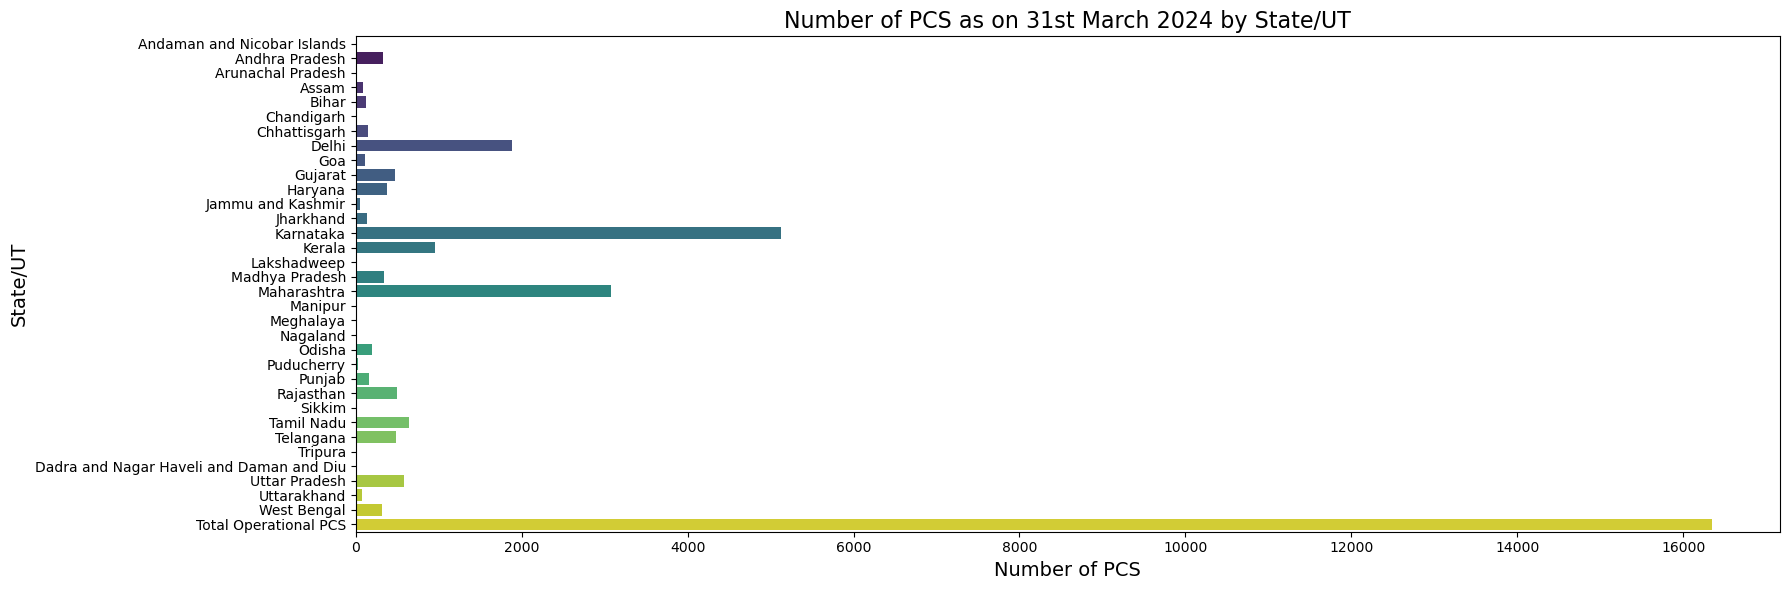

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Horizontal bar plot
plt.figure(figsize=(18, 6))
sns.barplot(x='No. of PCS as on 31st March 2024', y='State/ UT', data=pcs_state_df, palette='viridis')
plt.title('Number of PCS as on 31st March 2024 by State/UT', fontsize=16)
plt.xlabel('Number of PCS', fontsize=14)
plt.ylabel('State/UT', fontsize=14)
plt.tight_layout()
plt.show()


In [8]:
df_EV_no = pd.read_csv('geoMap.csv')
df_EV_no.head()

,Region,no_of_EV
0,Tamil Nadu,100.0
1,Karnataka,97.0
2,Haryana,88.0
3,Goa,85.0
4,Maharashtra,85.0


In [9]:
df_EV_no['no_of_EV'].fillna(0, inplace=True)
df_EV_no.isnull().sum()


Region      0
no_of_EV    0
dtype: int64

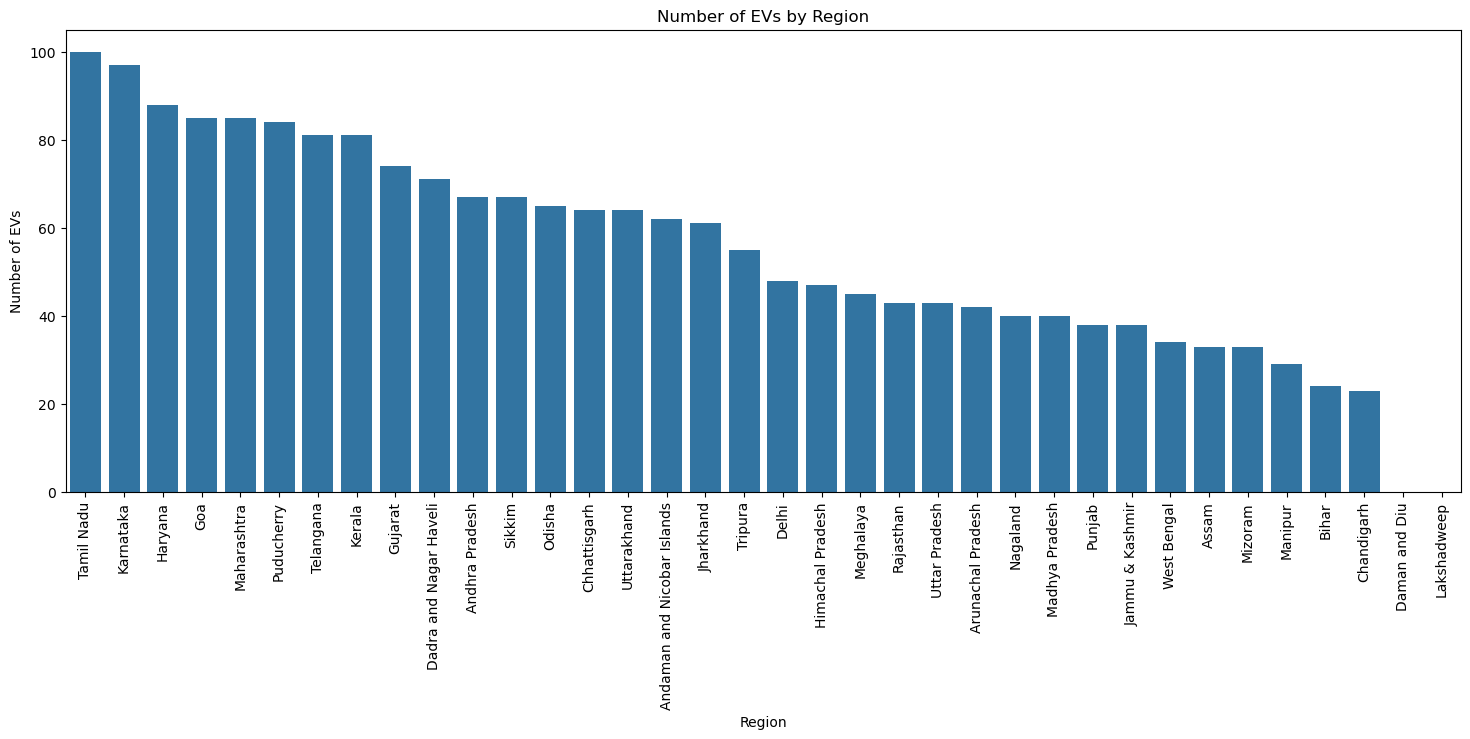

In [10]:
# 'Region' vs 'no_of_EV'
plt.figure(figsize=(18, 6))
sns.barplot(x='Region', y='no_of_EV', data=df_EV_no)
plt.xticks(rotation=90)
plt.title('Number of EVs by Region')
plt.xlabel('Region')
plt.ylabel('Number of EVs')
plt.show()


In [11]:
charging_stations = pd.read_csv("Number of EV charging Stations on National Highways.csv")
charging_stations.head(10)

,Sl. No.,State/UTs,Number of EV charging Stations on National Highways
0,1,Andaman and Nicobar Islands,1
1,2,Andhra Pradesh,249
2,3,Arunachal Pradesh,30
3,4,Assam,147
4,5,Bihar,96
5,6,Chhattisgarh,116
6,7,Delhi,10
7,8,Goa,33
8,9,Gujarat,259
9,10,Haryana,284


In [12]:
ev_data = pd.read_csv("RS_Session_259_AU_3475_1.csv")
ev_data.head(10)

,S. No.,State Name,Electric Vehicle Count
0,1,Andaman and Nicobar Island,182
1,2,Andhra Pradesh,51322
2,3,Arunachal Pradesh,24
3,4,Assam,94929
4,5,Bihar,128885
5,6,Chandigarh,5533
6,7,Chhattisgarh,40516
7,8,Delhi,203263
8,9,Goa,8710
9,10,Gujarat,99236


In [13]:
ev_data.rename(columns={'State Name': 'State/UTs', 'electric vehicle count': 'EV Count'}, inplace=True)
print(ev_data.columns)


Index(['S. No.', 'State/UTs', 'Electric Vehicle Count'], dtype='object')


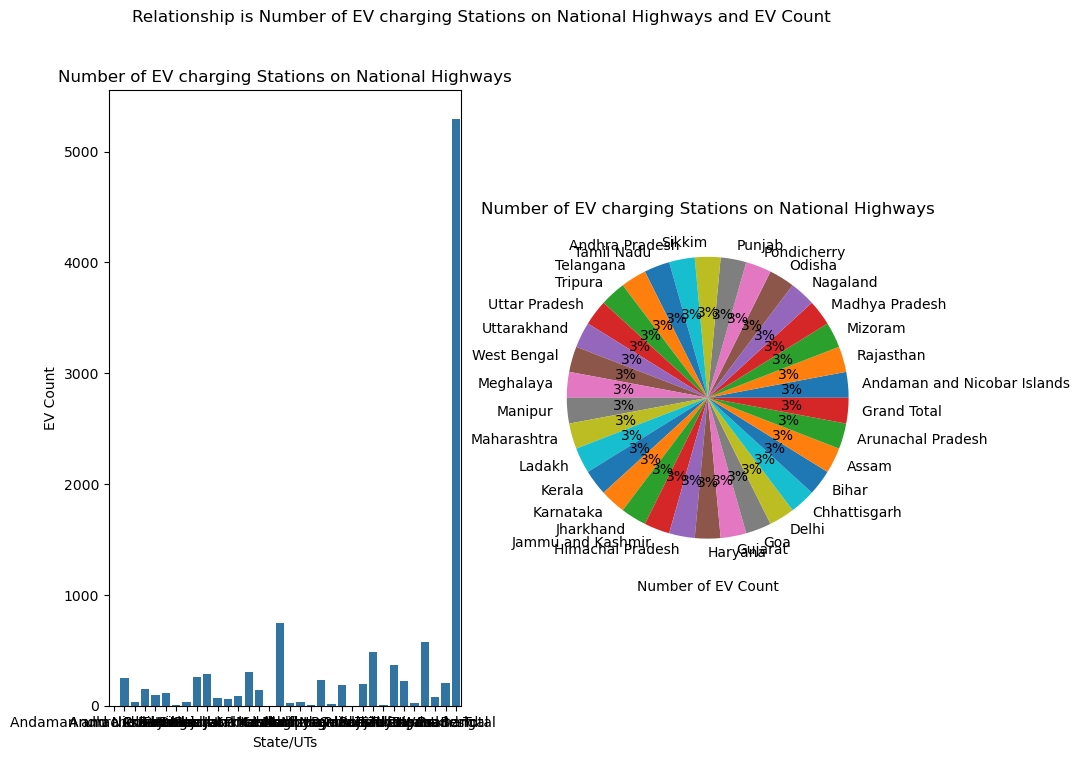

In [14]:
fig,axes = plt.subplots(1,2,figsize=(10,8))

fig.suptitle("Relationship is Number of EV charging Stations on National Highways and EV Count ")

axes[0].set_title("Number of EV charging Stations on National Highways")
ax1 = sns.barplot(x = list(charging_stations['State/UTs']),y = list(charging_stations['Number of EV charging Stations on National Highways']),data=charging_stations,ax=axes[0])
ax1.set(xlabel = "State/UTs",ylabel = "EV Count")

dict_charging_stations = dict(charging_stations['State/UTs'].value_counts())
plt.subplot(122)
plt.pie(list(dict_charging_stations.values()),labels=list(dict_charging_stations.keys()),autopct='%.0f%%')
plt.title("Number of EV charging Stations on National Highways")
plt.xlabel("Number of EV Count")

plt.show()